In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
import pandas as pd
from sklearn.datasets import make_classification

# Define the number of informative features
n_informative = 8  # Adjust based on your dataset

# Define the number of redundant features
n_redundant = 2  # Adjust based on your dataset

# Define the total number of features
n_features = 11  # Number of features excluding the target variable 'HeartDisease'

# Specify the number of samples for the synthetic dataset
n_samples_synthetic = 10000  # Adjust based on your desired number of observations

# Generate synthetic data
X_synthetic, y_synthetic = make_classification(
    n_samples=n_samples_synthetic,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    random_state=42
)

# Create a DataFrame with synthetic data
synthetic_df = pd.DataFrame(X_synthetic, columns=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
                                                   'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])
synthetic_df['HeartDisease'] = y_synthetic

# Display the synthetic dataset
print(synthetic_df.head())


        Age       Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  2.421296 -0.553619      -0.655574   0.225047     3.091348   0.196315   
1 -1.272622 -3.186183       0.821838   1.562868     4.402131  -1.460232   
2  0.186191  0.055432       0.299974  -1.776708    -0.991569   0.448624   
3 -1.530941  1.815575      -2.114489   1.008999    -0.060136  -0.762963   
4 -3.169877 -5.224323       1.054915  -2.430856     0.485344  -2.110495   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0    0.740806  3.117410       -1.696186 -1.879640  0.959897             0  
1   -2.248078  2.830237        2.515153  3.467938  0.425394             1  
2    2.254904  1.537250       -0.749367 -0.150676  0.847344             1  
3   -2.731934 -0.068736        0.856789  3.965863 -0.725744             1  
4    2.152486  1.427093       -3.025141 -1.937343  0.858161             1  


In [6]:
df.shape

(918, 12)

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
# checking no. of unique values for each column
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

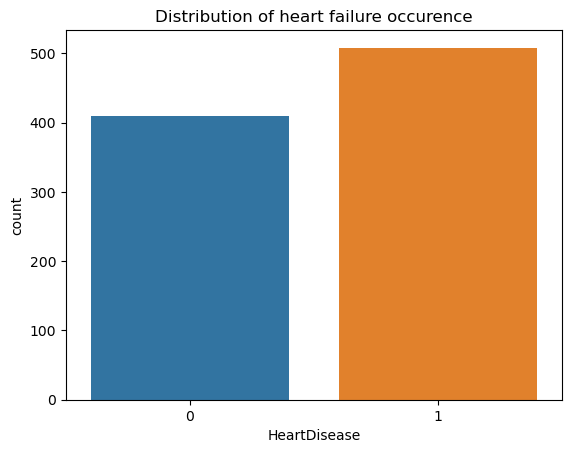

In [14]:
# Visualizing distribution of heart failure occurence
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of heart failure occurence')
plt.show()

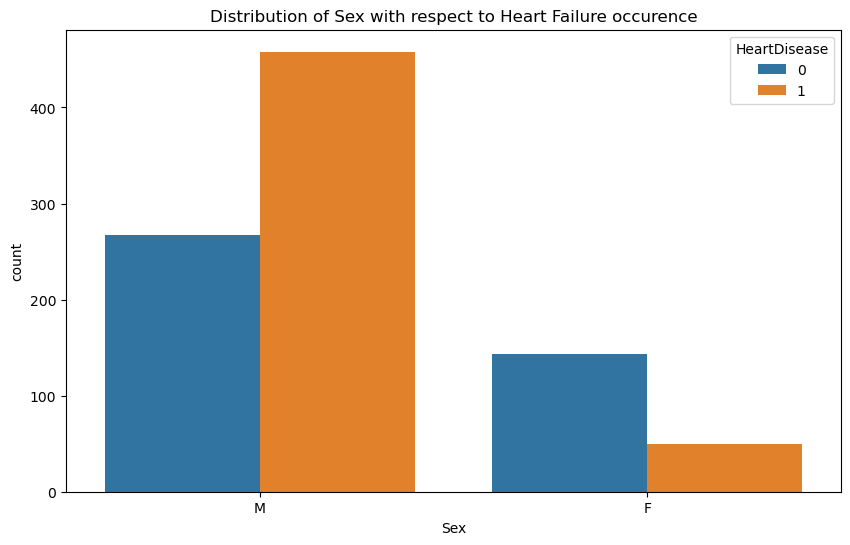

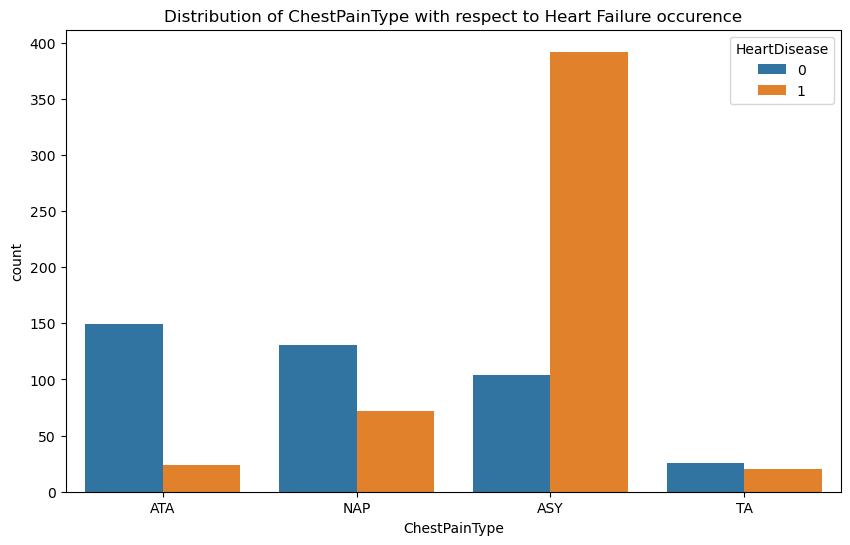

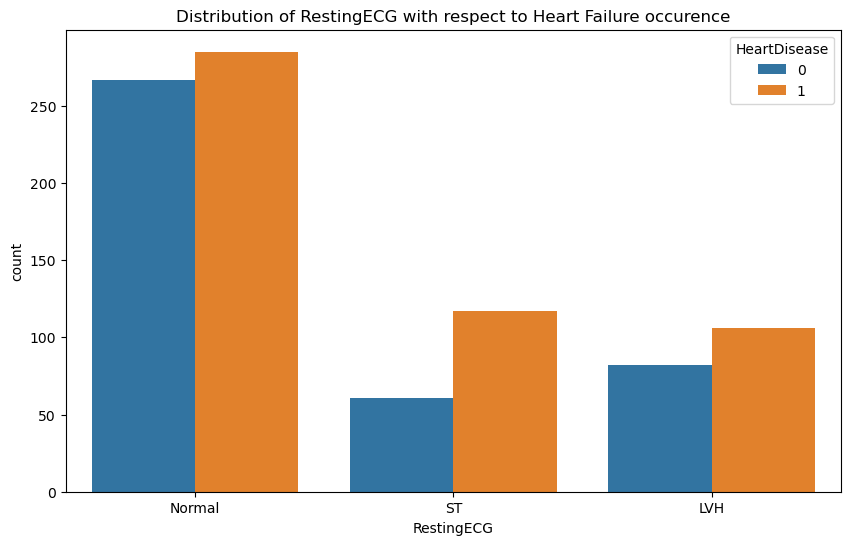

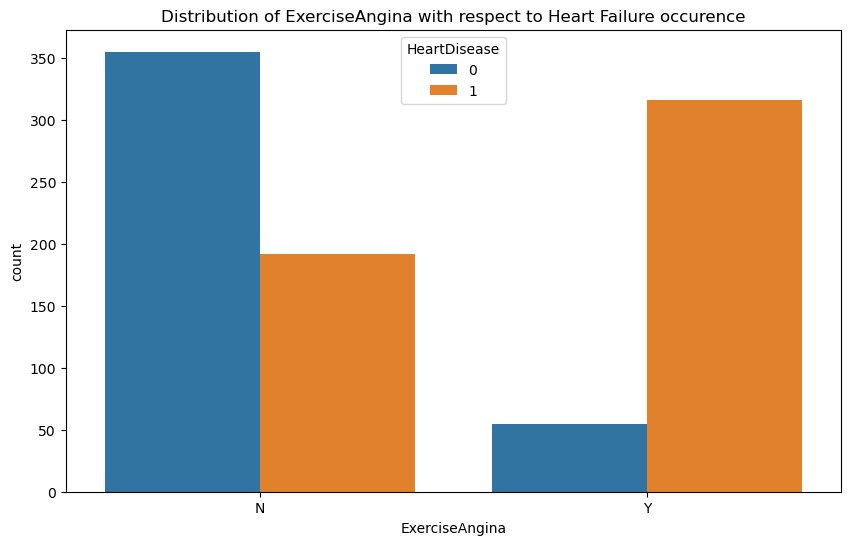

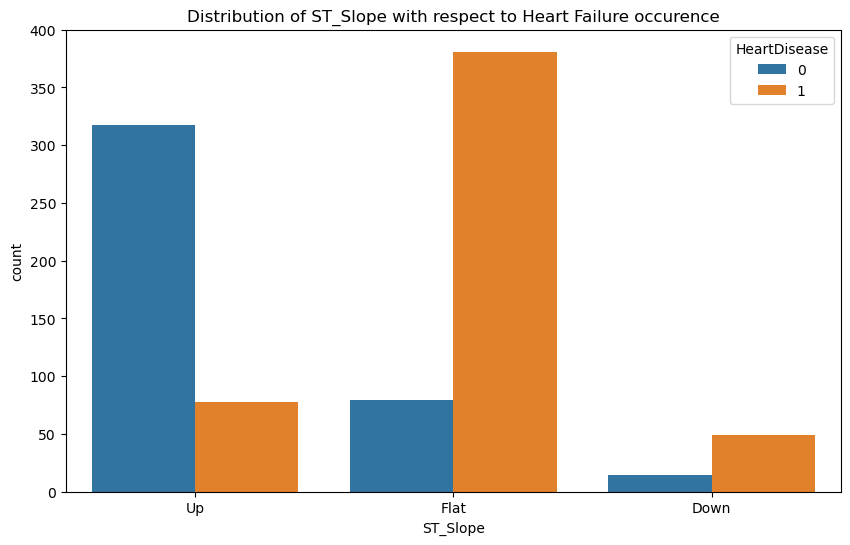

In [15]:
# Visualize the distribution of each categorical feature with respect to Heart Failure occurence
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, hue='HeartDisease', data=df)
    plt.title(f'Distribution of {col} with respect to Heart Failure occurence')
    plt.show()

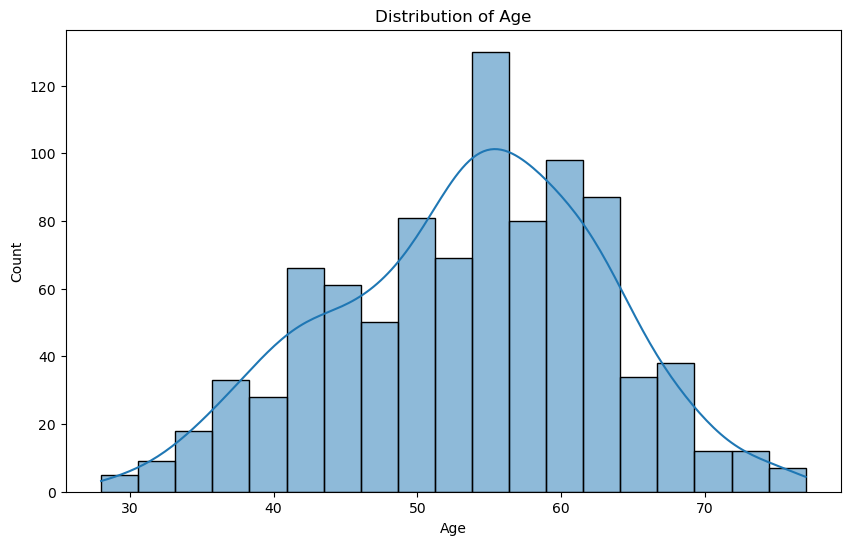

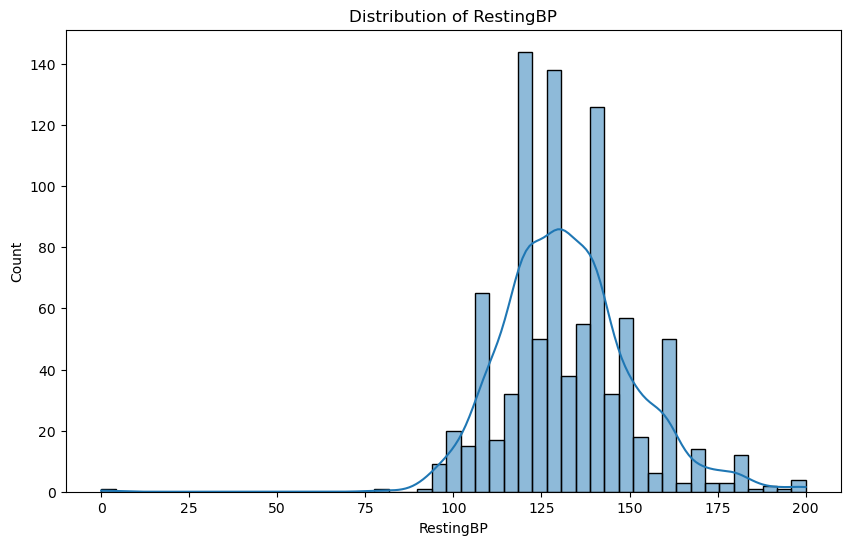

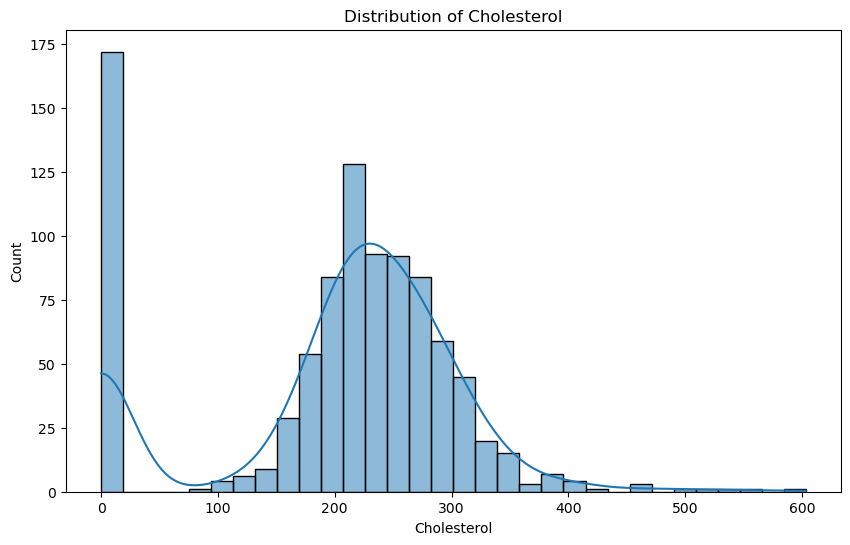

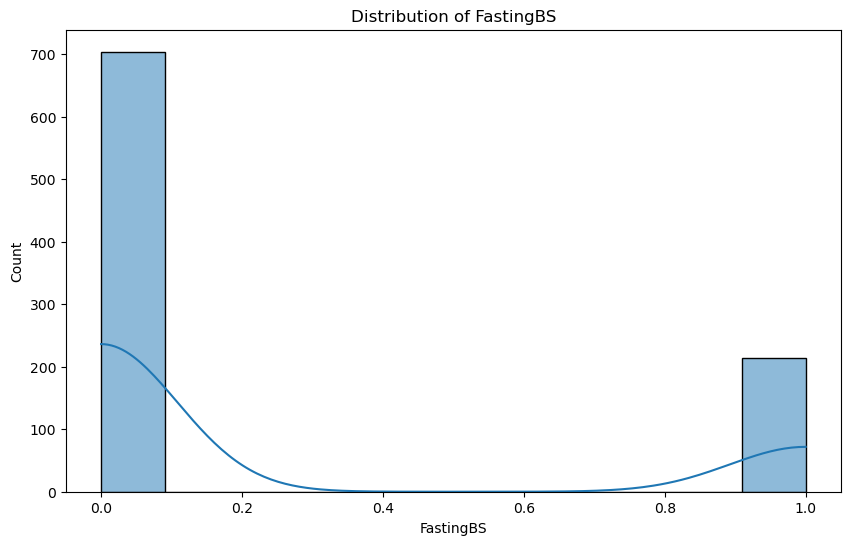

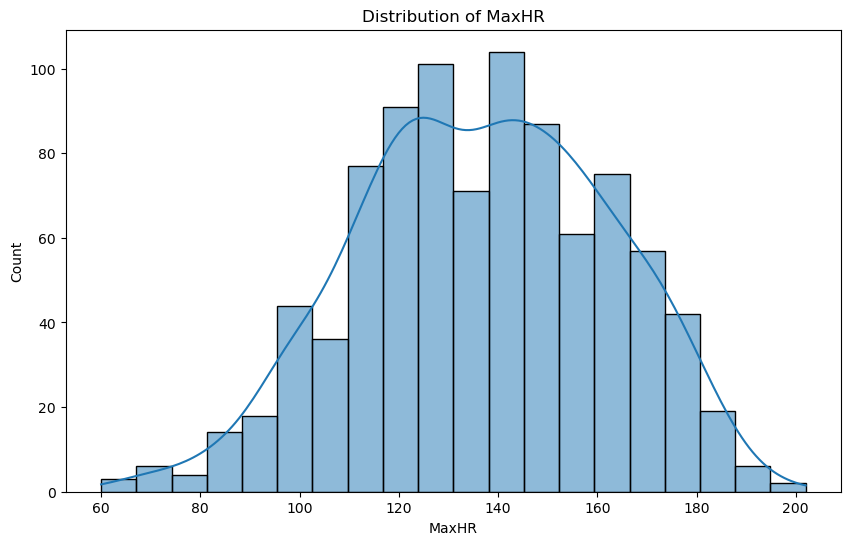

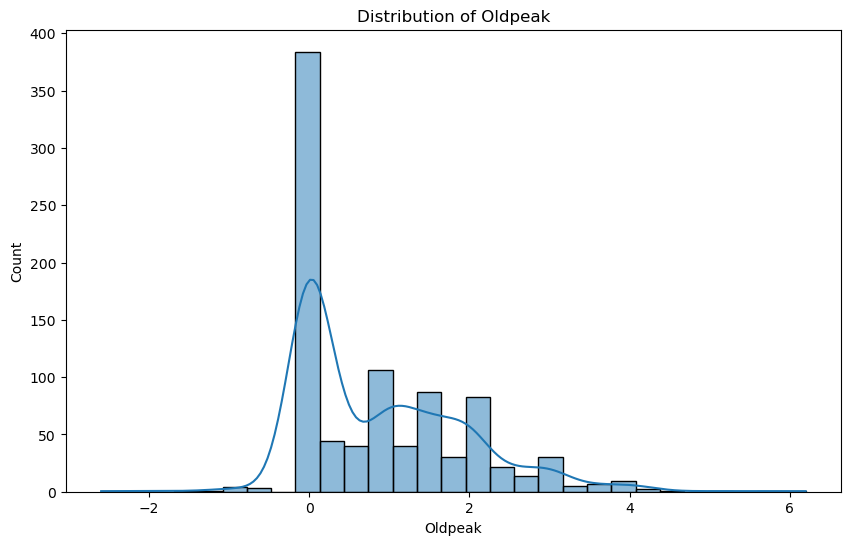

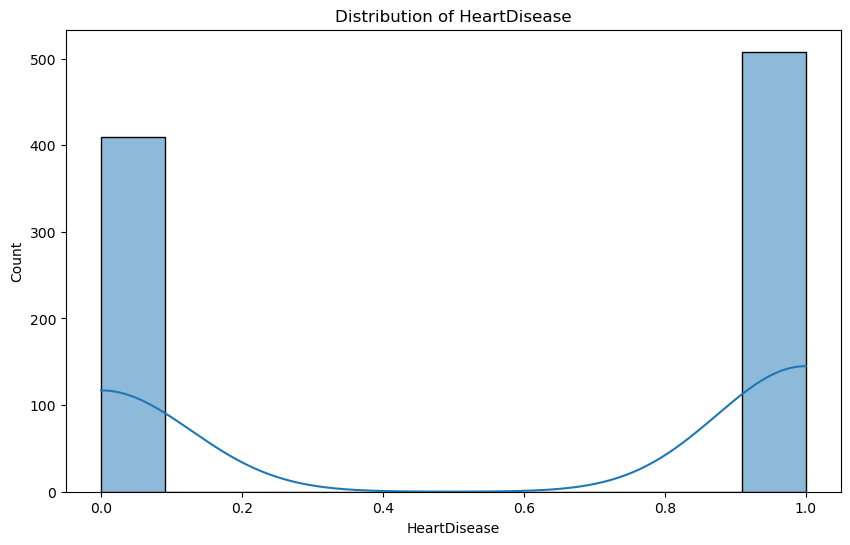

In [18]:
# Visualize the distribution of numerical features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(x=col, data=df, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()